# CHAPTER 1: DEFINITION OF THE PROBLEM STATEMENT AND ANALYZING BASIC METRICS

##**Introduction to Aerofit**

HISTORY:
>  `Aerofit` is a leading brand in the field of fitness equipment. Tag line of the Aerofit is `From Fit-less to Fitness`. Aerofit brand is owned by `Nityasach fitness Pvt Ltd` company. The parent company is `M/s Sachdev Sports Co` which was established as early as 1928 by late `Shri. Ram Ratan Sachdev.`


AEROFIT PRODUCTS:
> Aerofit provides a product range including machines such as `treadmills`, exercise bikes, gym equipment and fitness accessories to cater to the needs of all categories of people.







##**Problem Definition**

> The market research team at Aerofit wants to identify the `characteristics of the target audience for each type of treadmill` offered by the company.

> So that company can provide `better recommendations of the treadmills` to the new customers.

> The team decides to investigate whether there are any differences across the product with respect to customer characteristics.

> Perform descriptive analytics `to create a customer profile` for each Aerofit treadmill product by developing appropriate tables and charts.

> For each Aerofit treadmill product, construct `two-way contingency tables` and compute all `conditinal and marginal probabilities` along with their insights/impact on the business.

##**Dataset**

> The company collected the data on individuals who `purchased a treadmill from the Aerofit stores` during the `prior three months`

###*Importing the required Libraries*

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import lognorm
import io

### *Importing the dataset `Aerofit_treadmill.csv`*

In [168]:
# from google.colab import files
# uploaded = files.upload()

In [169]:
aerofit = pd.read_csv(io.BytesIO(uploaded['aerofit_treadmill.csv']))

In [170]:
aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### *Details regarding each column in dataset*

| Details| Regarding information|
|--------|----------------------| 
|Product Purchased:| KP281, KP481, KP781|
|Age:| In years|
|Gender:| Male/Female|
|Education:| In years|
|Marital Status:|Single or Partnered|
|Usage:|The average number of times the customer plans to use the treadmill each week|
|Income:|Annual Income(in $)|
|Fitness:|Self-rated fitness on a 1-to-5 scale, where 1 is the poor and 5 is the excellent shape|
|Miles:|The average number of miles the customer expects to walk/run each week|

### *Treadmill Product Portfolio* 

> The KP281 is an entry-level treadmill that sells for $1500.

> The KP481 is for mid-level runners that sell for $1750.

> The KP781 is having advanced features that sell for $2500.

##**Analysing Basic metrics**

Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [171]:
#Length of data
len(aerofit)

180

> `Number of rows` in given dataset = `180`

In [172]:
# Checking datatypes
aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

> String or Text related columns are with `Object` datatype. Whereas All remaining number related columns are with `int64` datatype.

In [173]:
#number of unique values in given dataset
for i in aerofit.columns:
    print(i,":",aerofit[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


> Product has only 3 unique categories: KP281, KP481, KP781

> Gender has 2 categories: Male or Female

> Marital Status has 2 categories: Single or Partnered

Range of Attributes

In [174]:
# Minimum and Maximum values of Numerical columns such as -
# Age, Education years, Usage years, Income, Miles columns
L = ["Age","Education","Usage","Fitness","Income","Miles"]
for i in L:
    print("Maximum value of ",i,"is",aerofit[i].max())
    print("Minimum value of ",i,"is",aerofit[i].min())

Maximum value of  Age is 50
Minimum value of  Age is 18
Maximum value of  Education is 21
Minimum value of  Education is 12
Maximum value of  Usage is 7
Minimum value of  Usage is 2
Maximum value of  Fitness is 5
Minimum value of  Fitness is 1
Maximum value of  Income is 104581
Minimum value of  Income is 29562
Maximum value of  Miles is 360
Minimum value of  Miles is 21


> Range of Age is 18 to 50 years

> Range of Education life in years is 12 to 21 years

> Range of Usage of treadmill is 2 to 7 years

> Range of Fitness rating is 1 to 5

> Range of Income is \$29562 to \$104581 per year

> Range of Miles runned on treadmill is 21 to 360 miles

In [175]:
#Statistical Summary
aerofit.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Mean
> age: 28.7888 years <br>
> Education life : 15.5722 years <br>
> Usage years: 3.4555 years <br>
> Fitness rating: 3.3111 <br>
> Income: $53719.5777 <br>
> Miles runned: 103.1944 miles

Standard Deviation
> age: 6.9434 years <br>
> Education life : 1.6170 years <br>
> Usage years: 1.0847 years <br>
> Fitness rating: 0.9588 <br>
> Income: $16506.6842 <br>
> Miles runned: 51.8636 miles

Median or 50% percentile
> age: 26 years <br>
> Education life : 16 years <br>
> Usage years: 3 years <br>
> Fitness rating: 3 <br>
> Income: $50596.5 <br>
> Miles runned: 94 miles

In [176]:
#mode value of each column
print("Mode values of all columns (both categorical and numerical")
aerofit.mode()

Mode values of all columns (both categorical and numerical


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,25,Male,16,Partnered,3,3,45480,85


# CHAPTER 2: MISSING VALUE AND OUTLIER DETECTION

##**Missing value Detection**

In [177]:
#checking null values in every column of our data
aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

> Interestingly, No null values in the given dataset

> So no need to do any type of imputations or no need to handle null values

##**Outlier Detection**

###Boxplot for detection of outliers of each column

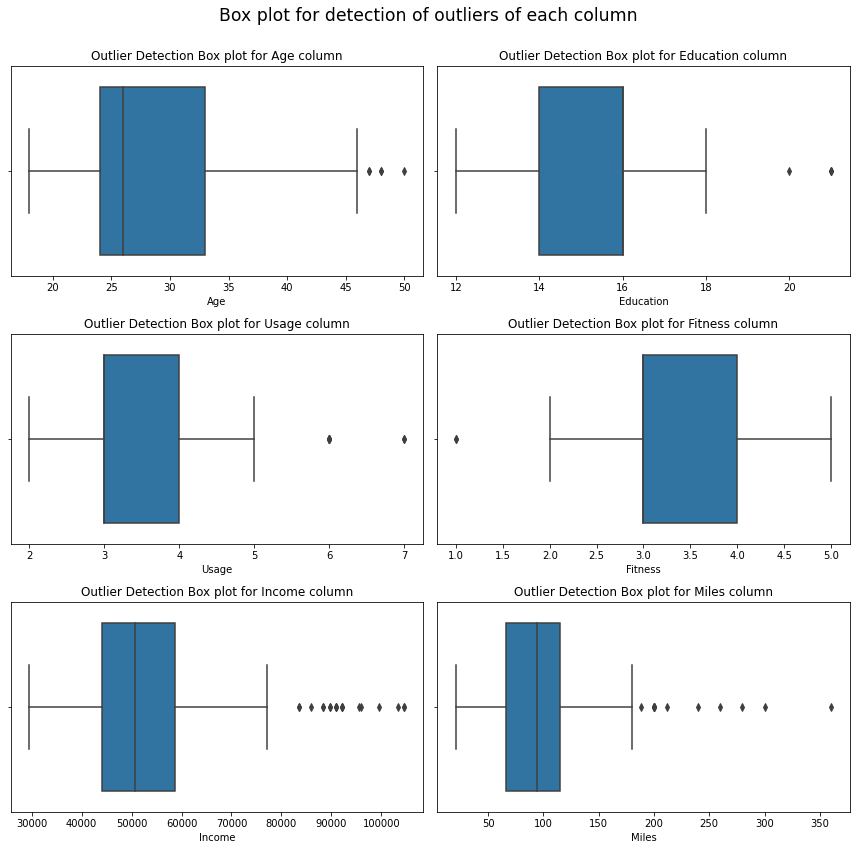

In [178]:
fig = plt.figure(figsize = (12,12))
fig.suptitle("Box plot for detection of outliers of each column\n",fontsize = "xx-large" )
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
k = 1
for i in iloc_positions_of_numerical_columns:
    plt.subplot(3,2,k)
    plt.title("Outlier Detection Box plot for {} column".format(aerofit.columns[i]))
    plt.xlabel(aerofit.columns[i])
    sns.boxplot(data=aerofit, x = aerofit.iloc[:,i],orient="h")
    k = k+1
plt.tight_layout()
plt.show()

> More number of outliers are observed in Income and Miles column

### Finding Outliers using Statistical methods

In [179]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
for i in iloc_positions_of_numerical_columns:
    outliers = find_outliers_IQR(aerofit.iloc[:,i])
    print("Outliers of {}".format(aerofit.columns[i]))
    print("number of outliers of {}: ".format(aerofit.columns[i])+ str(len(outliers)))
    print("max outlier value of {}: ".format(aerofit.columns[i])+ str(outliers.max()))
    print("min outlier value of {}: ".format(aerofit.columns[i])+ str(outliers.min()),end="\n\n")

Outliers of Age
number of outliers of Age: 5
max outlier value of Age: 50
min outlier value of Age: 47

Outliers of Education
number of outliers of Education: 4
max outlier value of Education: 21
min outlier value of Education: 20

Outliers of Usage
number of outliers of Usage: 9
max outlier value of Usage: 7
min outlier value of Usage: 6

Outliers of Fitness
number of outliers of Fitness: 2
max outlier value of Fitness: 1
min outlier value of Fitness: 1

Outliers of Income
number of outliers of Income: 19
max outlier value of Income: 104581
min outlier value of Income: 83416

Outliers of Miles
number of outliers of Miles: 13
max outlier value of Miles: 360
min outlier value of Miles: 188



### Bounding/Capping the outliers to upper or lower limits

In [180]:
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [181]:
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
for i in iloc_positions_of_numerical_columns:
    # finding upper limit and lower limit by using 3 sigma on either side of mean value
    upper_limit = aerofit.iloc[:,i].mean() + 3*aerofit.iloc[:,i].std()
    print("The upper bound limit of {} is ".format(aerofit.columns[i]),upper_limit)
    lower_limit = aerofit.iloc[:,i].mean() - 3*aerofit.iloc[:,i].std()
    print("The lower bound limit of {} is ".format(aerofit.columns[i]),lower_limit)
    aerofit.iloc[:,i] = np.where(aerofit.iloc[:,i] > upper_limit, 
                                        upper_limit, 
                                        np.where(aerofit.iloc[:,i] < lower_limit,
                                                lower_limit,aerofit.iloc[:,i]))
print("\nDataset Outliers are Bounded")

The upper bound limit of Age is  49.61938329508827
The lower bound limit of Age is  7.958394482689503
The upper bound limit of Education is  20.423386915641892
The lower bound limit of Education is  10.721057528802552
The upper bound limit of Usage is  6.709946658744286
The lower bound limit of Usage is  0.2011644523668248
The upper bound limit of Fitness is  6.187716807969046
The lower bound limit of Fitness is  0.434505414253175
The upper bound limit of Income is  103239.63045649364
The lower bound limit of Income is  4199.525099061917
The upper bound limit of Miles is  258.7852584298724
The lower bound limit of Miles is  -52.396369540983486

Dataset Outliers are Bounded


In [182]:
aerofit.describe() # after Bounding the outliers

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.786774,15.562612,3.452333,3.311111,53704.138285,102.278561
std,6.937057,1.586014,1.074588,0.958869,16459.421538,48.302671
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,49.619383,20.423387,6.709947,5.000000,103239.630456,258.785258


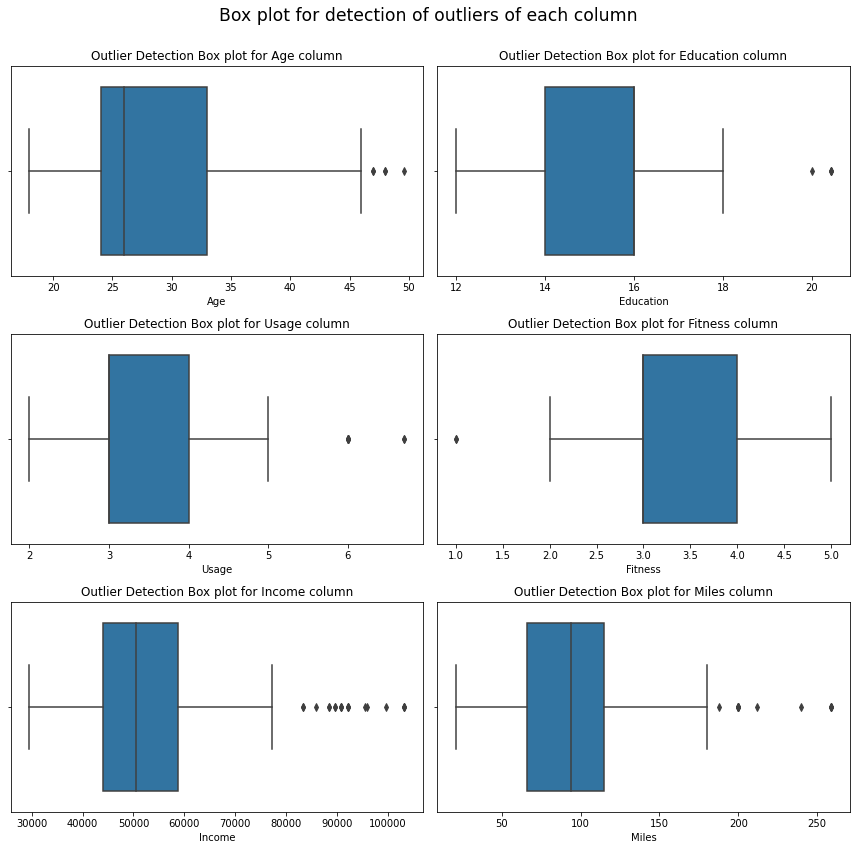

In [183]:
# Box plot after bounding
fig = plt.figure(figsize = (12,12))
fig.suptitle("Box plot for detection of outliers of each column\n",fontsize = "xx-large" )
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
k = 1
for i in iloc_positions_of_numerical_columns:
    plt.subplot(3,2,k)
    plt.title("Outlier Detection Box plot for {} column".format(aerofit.columns[i]))
    plt.xlabel(aerofit.columns[i])
    sns.boxplot(data=aerofit, x = aerofit.iloc[:,i],orient="h")
    k = k+1
plt.tight_layout()
plt.show()

> By Bounding the outliers to upper limit or lower limit, There is `difference between statistical values of miles column`. Number of outliers in Miles are decreased

### Important Observations:


1. There are `no NULL Values` in the dataset.
2. There are 3 Threadmills. `KP281 (Low range), KP481 (Mid range) and KP781 (High range)`
3. KP281 is mostly bought product. (`USERS CHOICE`)
4. There are 180 customers data records. Out of 180, `Male : Female = 104 : 76`,`Single: Partnered = 73 : 107`
4. `25% of customers have Age below 24 years and 75% of customers have Age below 33 years`. Range of Age is 18 to 50 years.
5. `25% of customers have Education life below 14 years and 75% of customers have Education life below 16 years`. Range of Education life is 12 to 21 years.
6. Most of the customers are `using the product about 3 to 4 years` (according to 75 percentile and 25 percentile)
7. According to Box plot outliers and Statistical analysis using IQR, `Number of outliers are more in the Income and Miles column`. 
8. After Bounding the outliers, The Mean income value modified from `$53719 to $53704`. The Max income value modified from `$104581 to $103239.63`
9. After Bounding the outliers, The Mean miles runned modified from `103.19 to 102.27`. The Max miles runned modified from `360 to 258.78`


# CHAPTER 3: NON-GRAPHICAL ANALYSIS

## Value counts

In [184]:
# Checking the occurences of each of the column.
for i in aerofit.columns:
    print(i,aerofit[i].value_counts(),sep="\n")
    print("\n")

Product
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


Age
25.000000    25
23.000000    18
24.000000    12
26.000000    12
28.000000     9
35.000000     8
33.000000     8
30.000000     7
38.000000     7
21.000000     7
22.000000     7
27.000000     7
31.000000     6
34.000000     6
29.000000     6
20.000000     5
40.000000     5
32.000000     4
19.000000     4
48.000000     2
37.000000     2
45.000000     2
47.000000     2
46.000000     1
49.619383     1
18.000000     1
44.000000     1
43.000000     1
41.000000     1
39.000000     1
36.000000     1
42.000000     1
Name: Age, dtype: int64


Gender
Male      104
Female     76
Name: Gender, dtype: int64


Education
16.000000    85
14.000000    55
18.000000    23
15.000000     5
13.000000     5
12.000000     3
20.423387     3
20.000000     1
Name: Education, dtype: int64


MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


Usage
3.000000    69
4.000000    52
2.000000    33
5.000000    17


## Unique Attributes

In [185]:
# Checking the unique attributes for all columns
for i in aerofit.columns:
    print(i,aerofit[i].unique(),sep="\n")
    print("\n")

Product
['KP281' 'KP481' 'KP781']


Age
[18.        19.        20.        21.        22.        23.
 24.        25.        26.        27.        28.        29.
 30.        31.        32.        33.        34.        35.
 36.        37.        38.        39.        40.        41.
 43.        44.        46.        47.        49.6193833 45.
 48.        42.       ]


Gender
['Male' 'Female']


Education
[14.         15.         12.         13.         16.         18.
 20.         20.42338692]


MaritalStatus
['Single' 'Partnered']


Usage
[3.         2.         4.         5.         6.         6.70994666]


Fitness
[4. 3. 2. 1. 5.]


Income
[ 29562.          31836.          30699.          32973.
  35247.          37521.          36384.          38658.
  40932.          34110.          39795.          42069.
  44343.          45480.          46617.          48891.
  53439.          43206.          52302.          51165.
  50028.          54576.          68220.          55713.
  60261.     

##Cross_tab - Marginal and Conditional Probabilities

In [186]:
pd.crosstab(aerofit["MaritalStatus"],aerofit["Product"],margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


MARGINAL PROBABILITIES

> What is the probability that a customer is single?
<br> Ans: 73/180 = 0.4055

> What is the probability that a customer is partnered?
<br> Ans: 107/180 = 0.5944

> What is the probability that a customer buys KP281?
<br> Ans: 80/180 = 0.4444

> What is the probability that a customer buys KP481?
<br> Ans: 60/180 = 0.3333

> What is the probability that a customer buys KP781?
<br> Ans: 40/180 = 0.2222

CONDITIONAL PROBABILITIES

> What is the probability that a customer buys KP281, given that he/she is single?
<br>Ans: 32/73 = 0.4383

> What is the probability that a customer buys KP281, given that he/she is Partnered?
<br>Ans: 48/107 = 0.4485

> What is the probability that a customer buys KP481, given that he/she is single?
<br>Ans: 24/73 = 0.3287

> What is the probability that a customer buys KP481, given that he/she is Partnered?
<br>Ans: 36/107 = 0.3364

> What is the probability that a customer buys KP781, given that he/she is single?
<br>Ans: 17/73 = 0.2328

> What is the probability that a customer buys KP781, given that he/she is Partnered?
<br>Ans: 23/107 = 0.2149

In [187]:
pd.crosstab(aerofit["Gender"],aerofit["Product"],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


MARGINAL PROBABILITIES

>What is the probability that a customer is Male?
<br> Ans: 104/180 = 0.5777

>What is the probability that a customer is Female?
<br> Ans: 76/180 = 0.4222

CONDITIONAL PROBABILITIES

> What is the probability that a customer buys KP281, given that he/she is Male?
<br>Ans: 40/104 = 0.3846

> What is the probability that a customer buys KP281, given that he/she is Female?
<br>Ans: 40/76 = 0.5263

> What is the probability that a customer buys KP481, given that he/she is Male?
<br>Ans: 31/104 = 0.29807

> What is the probability that a customer buys KP481, given that he/she is Female?
<br>Ans: 29/76 = 0.3815

> What is the probability that a customer buys KP781, given that he/she is Male?
<br>Ans: 33/104 = 0.3173

> What is the probability that a customer buys KP781, given that he/she is Female?
<br>Ans: 7/76 = 0.0921

In [188]:
pd.crosstab(aerofit["Product"],[aerofit["Gender"],aerofit["MaritalStatus"]],margins = True)

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

CONDITIONAL PROBABILITIES on FEMALE PARTNERED AND SINGLE CUSTOMER

> What is the probability that a customer buys KP281 given that she is a female and partnered?
<br> Ans: 27/46 = 0.5869

> What is the probability that a customer buys KP481 given that she is a female and partnered?
<br> Ans: 15/46 = 0.3260

> What is the probability that a customer buys KP781 given that she is a female and partnered?
<br> Ans: 4/46 = 0.0869

> What is the probability that a customer buys KP281 given that she is a female and single?
<br> Ans: 13/30 = 0.4333

> What is the probability that a customer buys KP481 given that she is a female and single?
<br> Ans: 14/30 = 0.4666

> What is the probability that a customer buys KP781 given that she is a female and single?
<br> Ans: 3/30 = 0.1

CONDITIONAL PROBABILITIES MALE PARTNERED AND SINGLE CUSTOMER

> What is the probability that a customer buys KP281 given that she is a male and partnered?
<br> Ans: 21/61 = 0.3442

> What is the probability that a customer buys KP481 given that she is a male and partnered?
<br> Ans: 21/61 = 0.3442

> What is the probability that a customer buys KP781 given that she is a male and partnered?
<br> Ans: 19/61 = 0.3114

> What is the probability that a customer buys KP281 given that she is a male and single?
<br> Ans: 19/43 = 0.4418

> What is the probability that a customer buys KP481 given that she is a male and single?
<br> Ans: 10/43 = 0.2325

> What is the probability that a customer buys KP781 given that she is a male and single?
<br> Ans: 14/43 = 0.3255

BASED ON GENDER AND PRODUCT, CONDITIONAL PROBABILITIES

> What is the probability of customer being a female , given that customer bought KP281?
<br> Ans: 40/80 = 0.5

> What is the probability of customer being a male , given that customer bought KP281?
<br> Ans: 40/80 = 0.5

> What is the probability of customer being a female , given that customer bought KP481?
<br> Ans: 29/60 = 0.4833

> What is the probability of customer being a male , given that customer bought KP481?
<br> Ans: 31/60 = 0.5166

> What is the probability of customer being a female , given that customer bought KP781?
<br> Ans: 7/40 = 0.175

> What is the probability of customer being a male , given that customer bought KP781?
<br> Ans: 33/40 = 0.825

BASED ON MARITALSTATUS AND PRODUCT, CONDITIONAL PROBABILITIES

> What is the probability of customer being a PARTNERED , given that customer bought KP281?
<br> Ans: 48/80 = 0.6

> What is the probability of customer being a SINGLE , given that customer bought KP281?
<br> Ans: 32/80 = 0.4

> What is the probability of customer being a PARTNERED , given that customer bought KP481?
<br> Ans: 36/60 = 0.6

> What is the probability of customer being a SINGLE , given that customer bought KP481?
<br> Ans: 24/60 = 0.4

> What is the probability of customer being a PARTNERED , given that customer bought KP781?
<br> Ans: 23/40 = 0.575

> What is the probability of customer being a SINGLE , given that customer bought KP781?
<br> Ans: 17/40 = 0.425

## Cross tab with Mean Aggregate function (Categorical vs Numerical columns)

In [189]:
pd.crosstab(aerofit["Product"],aerofit["MaritalStatus"],values = aerofit["Age"],aggfunc = "mean",margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,29.658737,26.875000,28.545242
KP481,30.222222,26.916667,28.900000
KP781,29.826087,28.117647,29.100000
All,29.884293,27.178082,28.786774


> Average age of KP281 Single customers is 26.875

> Average age of KP481 Partnered customer is 30.222

In [190]:
pd.crosstab(aerofit["Product"],aerofit["Gender"],values = aerofit["Age"],aggfunc = "mean",margins = True)

Gender,Female,Male,All
Product,,,
KP281,28.440485,28.650000,28.545242
KP481,29.103448,28.709677,28.900000
KP781,27.000000,29.545455,29.100000
All,28.560781,28.951923,28.786774


> Average age of KP781 female customers is 27

> Average age of KP781 male customer is 29.545

In [191]:
pd.crosstab(aerofit["Product"],aerofit["MaritalStatus"],values = aerofit["Education"],aggfunc = "mean",margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,15.125000,14.906250,15.037500
KP481,15.250000,14.916667,15.116667
KP781,17.409712,17.108634,17.281754
All,15.658162,15.422559,15.562612


> Average Education life of single customers who bought KP281 is 14.9 years

> Average Education life of Partnered Customer who bought KP781 is 17.40 years

In [192]:
pd.crosstab(aerofit["Product"],aerofit["Gender"],values = aerofit["Education"],aggfunc = "mean",margins = True)

Gender,Female,Male,All
Product,,,
KP281,15.100000,14.975000,15.037500
KP481,15.206897,15.032258,15.116667
KP781,17.774770,17.177175,17.281754
All,15.387150,15.690834,15.562612


> Average Education life of Female customers who bought KP781 is 17.77 years

> Average Education life of male Customer who bought KP281 is 14.97 years

In [193]:
pd.crosstab(aerofit["Product"],[aerofit["Gender"],aerofit["MaritalStatus"]],values = aerofit["Education"],aggfunc="mean",margins = True)

Gender            Female                  Male                   All
MaritalStatus  Partnered     Single  Partnered     Single           
Product                                                             
KP281          14.888889  15.538462  15.428571  14.473684  15.037500
KP481          15.200000  15.214286  15.285714  14.500000  15.116667
KP781          17.500000  18.141129  17.390705  16.887385  17.281754
All            15.217391  15.647446  15.990547  15.265660  15.562612

> Average Education life of Male single customer of KP281 is 14.47 years

> Average Education life of Female Single customer of KP781 is 18.141 years

In [194]:
pd.crosstab(aerofit["Product"],aerofit["MaritalStatus"],values = aerofit["Usage"],aggfunc = "mean",margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,3.041667,3.156250,3.087500
KP481,3.055556,3.083333,3.066667
KP781,4.887821,4.588235,4.760497
All,3.443177,3.465753,3.452333


> Average Usage of Partnered customers who bought KP281 is 3.0416 per week

> Average Usage of Partnered Customer who bought KP781 is 4.887 per week

In [195]:
pd.crosstab(aerofit["Product"],aerofit["Gender"],values = aerofit["Usage"],aggfunc = "mean",margins = True)

Gender,Female,Male,All
Product,,,
KP281,2.900000,3.275000,3.087500
KP481,3.137931,3.000000,3.066667
KP781,5.000000,4.709694,4.760497
All,3.184211,3.648268,3.452333


> Average Usage of Female customers who bought KP281 is 2.9 per week

> Average Usage of male Customer who bought KP781 is 5 per week

In [196]:
pd.crosstab(aerofit["Product"],[aerofit["Gender"],aerofit["MaritalStatus"]],values = aerofit["Usage"],aggfunc="mean",margins = True)

Gender           Female                Male                 All
MaritalStatus Partnered    Single Partnered    Single          
Product                                                        
KP281          2.851852  3.000000  3.285714  3.263158  3.087500
KP481          3.333333  2.928571  2.857143  3.300000  3.066667
KP781          5.250000  4.666667  4.811573  4.571429  4.760497
All            3.217391  3.133333  3.613441  3.697674  3.452333

> Average Usage of Female Partnered customer of KP281 product is 2.851852 per week

> Average Usage of Female Partnered customer of KP781 product is 5.25 per week

In [197]:
pd.crosstab(aerofit["Product"],aerofit["MaritalStatus"],values = aerofit["Income"],aggfunc = "mean",margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,47848.750000,44271.937500,46418.025000
KP481,49522.666667,48150.125000,48973.650000
KP781,81926.343103,66504.588235,75372.097284
All,55737.027022,50724.424658,53704.138285


> Average Income of Single customers who bought KP281 is \$44271.937

> Average Income of Partnered Customer who bought KP781 is \$81926.343

In [198]:
pd.crosstab(aerofit["Product"],aerofit["Gender"],values = aerofit["Income"],aggfunc = "mean",margins = True)

Gender,Female,Male,All
Product,,,
KP281,46020.075000,46815.975000,46418.025000
KP481,49336.448276,48634.258065,48973.650000
KP781,73633.857143,75740.814890,75372.097284
All,49828.907895,56536.037417,53704.138285


> Average Income of Female customers who bought KP281 is \$46020.075

> Average Income of male Customer who bought KP781 is \$73633.857

In [199]:
pd.crosstab(aerofit["Product"],[aerofit["Gender"],aerofit["MaritalStatus"]],values = aerofit["Income"],aggfunc="mean",margins = True)

Gender               Female                        Male                \
MaritalStatus     Partnered        Single     Partnered        Single   
Product                                                                 
KP281          46153.777778  45742.384615  50028.000000  43265.842105   
KP481          49724.800000  48920.357143  49378.285714  47071.800000   
KP781          84972.250000  58516.000000  81285.099546  68216.428571   
All            50693.760870  48502.800000  59540.145760  52274.395349   

Gender                  All  
MaritalStatus                
Product                      
KP281          46418.025000  
KP481          48973.650000  
KP781          75372.097284  
All            53704.138285

> Average Income of male Single customer of KP281 product is \$43265.8421

> Average Income of Female Partnered customer of KP781 is \$84972.25

In [200]:
pd.crosstab(aerofit["Product"],aerofit["MaritalStatus"],values = aerofit["Fitness"],aggfunc = "mean",margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,2.854167,3.125000,2.962500
KP481,2.916667,2.875000,2.900000
KP781,4.695652,4.529412,4.625000
All,3.271028,3.369863,3.311111


> Average Fitness of Partnered customers who bought KP281 is 2.85 

> Average Fitness of Partnered Customer who bought KP781 is 4.69

In [201]:
pd.crosstab(aerofit["Product"],aerofit["Gender"],values = aerofit["Fitness"],aggfunc = "mean",margins = True)

Gender,Female,Male,All
Product,,,
KP281,2.875000,3.050000,2.962500
KP481,2.862069,2.935484,2.900000
KP781,4.571429,4.636364,4.625000
All,3.026316,3.519231,3.311111


> Average Fitness of Female customers who bought KP781 is 4.57

> Average Fitness of Female Customer who bought KP481 is 2.86

In [202]:
pd.crosstab(aerofit["Product"],[aerofit["Gender"],aerofit["MaritalStatus"]],values = aerofit["Fitness"],aggfunc="mean",margins = True)

Gender           Female                Male                 All
MaritalStatus Partnered    Single Partnered    Single          
Product                                                        
KP281          2.851852  2.923077  2.857143  3.263158  2.962500
KP481          2.933333  2.785714  2.904762  3.000000  2.900000
KP781          5.000000  4.000000  4.631579  4.642857  4.625000
All            3.065217  2.966667  3.426230  3.651163  3.311111

> Average Fitness of female Single customer of KP481 product 2.78

> Average Fitness of Female Partnered customer of KP781 is 5

In [203]:
pd.crosstab(aerofit["Product"],aerofit["MaritalStatus"],values = aerofit["Miles"],aggfunc = "mean",margins = True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,77.229167,91.125000,82.787500
KP481,90.055556,84.750000,87.933333
KP781,175.875697,145.058824,162.778526
All,102.748982,101.589041,102.278561


> Average Miles runned by Partnered customers who bought KP281 is 77.22 miles

> Average Miles runned by Partnered Customer who bought KP781 is 175.875 miles

In [204]:
pd.crosstab(aerofit["Product"],aerofit["Gender"],values = aerofit["Miles"],aggfunc = "mean",margins = True)

Gender,Female,Male,All
Product,,,
KP281,76.200000,89.375000,82.787500
KP481,87.344828,88.483871,87.933333
KP781,176.969323,159.768357,162.778526
All,89.734017,111.445729,102.278561


> Average Miles runned by Female customers who bought KP781 is 176.96 miles

> Average Miles runned by Female Customer who bought KP281 is 76.2 miles

In [205]:
pd.crosstab(aerofit["Product"],[aerofit["Gender"],aerofit["MaritalStatus"]],values = aerofit["Miles"],aggfunc="mean",margins = True)

Gender             Female                    Male                     All
MaritalStatus   Partnered      Single   Partnered      Single            
Product                                                                  
KP281           74.925926   78.846154   80.190476   99.526316   82.787500
KP481           94.000000   80.214286   87.238095   91.100000   87.933333
KP781          209.696315  133.333333  168.755567  147.571429  162.778526
All             92.864897   84.933333  110.202554  113.209302  102.278561

> Average Miles runned by female Partnered customer of KP281 product 74.92

> Average Miles runned by Female Partnered customer of KP781 is 209.69

# CHAPTER 4: VISUAL ANALYSIS

##Univariate and Bivariate Plots between two categorical columns: Marital Status and Product


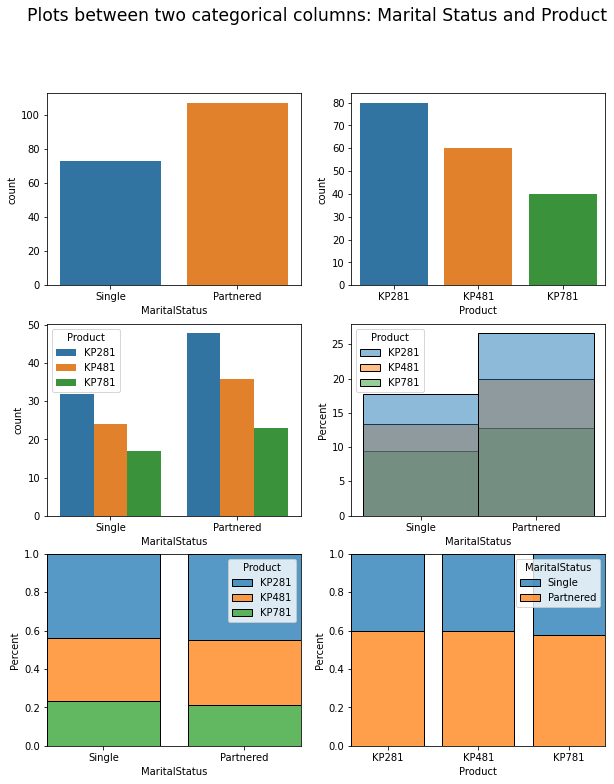

In [206]:
plt.figure(figsize=(10,12))
plt.suptitle("Plots between two categorical columns: Marital Status and Product",fontsize = "xx-large")
plt.subplot(3,2,1)
sns.countplot(data=aerofit,x="MaritalStatus")
plt.subplot(3,2,2)
sns.countplot(data=aerofit,x="Product")
plt.subplot(3,2,3)
sns.countplot(data=aerofit,x="MaritalStatus",hue="Product")
plt.subplot(3,2,4)
sns.histplot(data=aerofit,x="MaritalStatus",hue="Product",stat="percent")
plt.subplot(3,2,5)
sns.histplot(data=aerofit,x="MaritalStatus",hue="Product",stat="percent",multiple="fill",shrink=0.8)
plt.subplot(3,2,6)
sns.histplot(data=aerofit,x="Product",hue="MaritalStatus",stat="percent",multiple="fill",shrink=0.8)
plt.show()

Observations from above graphs:
> Number of partnered customers were greater than Number of Single customers

> Descending order sequence of Number of customer of each product is  KP 281 --> 481 --> 781 (Same trend is followed for Single and partnered customers individually also)

> `According to stacked hist plot, slightly more Percentage of single customers were bought KP 781. Whereas Slightly more percentage of partnered customers were bought KP 281.`


##Bivariate Plots between categorical columns 'Product','MaritalStatus' and numerical column 'Age'


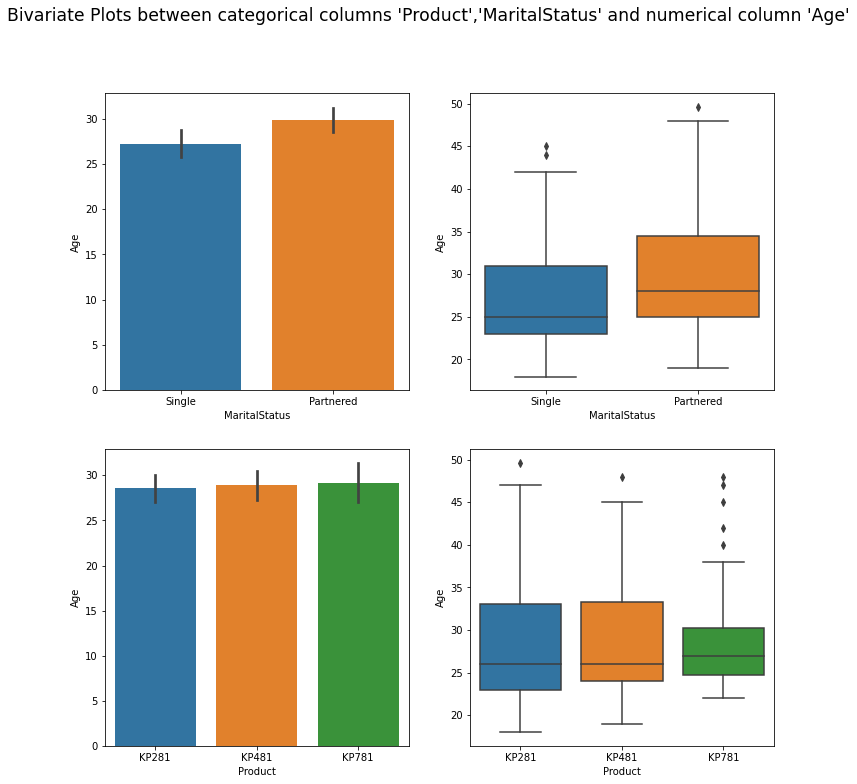

In [207]:
plt.figure(figsize=(12,12))
plt.suptitle("Bivariate Plots between categorical columns 'Product','MaritalStatus' and numerical column 'Age'",fontsize = "xx-large")
plt.subplot(2,2,1)
sns.barplot(data=aerofit,x="MaritalStatus",y="Age")
plt.subplot(2,2,2)
sns.boxplot(data=aerofit,x="MaritalStatus",y="Age")
plt.subplot(2,2,3)
sns.barplot(data=aerofit,x="Product",y="Age")
plt.subplot(2,2,4)
sns.boxplot(data=aerofit,x="Product",y="Age")
plt.show()

> with respect to Age, KP281 product is dispersed over all types of ages. But KP 781 has more number of outliers. It is mostly prefered from Age range of 24 to 30 years.

> All percentile values of partnered customers are having higher values than single customers.

##Trivariate Plots between categorical columns 'Product','Marital Status' and numerical column 'Age'

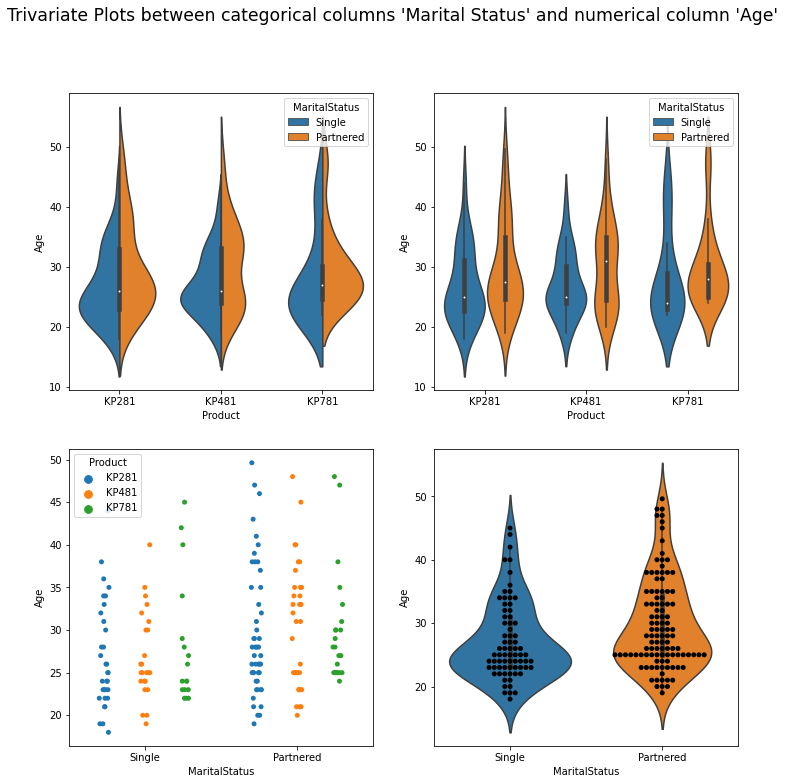

In [208]:
plt.figure(figsize=(12,12))
plt.suptitle("Trivariate Plots between categorical columns 'Marital Status' and numerical column 'Age'",fontsize = "xx-large")
plt.subplot(2,2,1)
sns.violinplot(data=aerofit,x="Product",y="Age",hue = "MaritalStatus",split=True)
plt.subplot(2,2,2)
sns.violinplot(data=aerofit,x="Product",y="Age",hue = "MaritalStatus",split=False)
plt.subplot(2,2,3)
sns.stripplot(data=aerofit,x="MaritalStatus",y="Age",hue = "Product",jitter = True, dodge = True,)
plt.subplot(2,2,4)
sns.violinplot(data=aerofit,x="MaritalStatus",y="Age")
sns.swarmplot(data=aerofit,x="MaritalStatus",y="Age",color="black")
plt.show()

## Binning of Age column

In [209]:
bins = list(range(18,51,4))
bins.insert(0,-np.inf)
bins.append(np.inf)
bins

[-inf, 18, 22, 26, 30, 34, 38, 42, 46, 50, inf]

In [210]:
aerofit_bins = aerofit.copy(deep = True)
aerofit_bins["Age_bins"] = pd.cut(aerofit["Age"],bins)

In [211]:
aerofit_bins["Age_bins"].value_counts()

(22.0, 26.0]    67
(26.0, 30.0]    29
(30.0, 34.0]    24
(18.0, 22.0]    23
(34.0, 38.0]    18
(38.0, 42.0]     8
(42.0, 46.0]     5
(46.0, 50.0]     5
(-inf, 18.0]     1
(50.0, inf]      0
Name: Age_bins, dtype: int64

In [212]:
pd.crosstab(aerofit_bins["MaritalStatus"], aerofit_bins["Age_bins"],margins = True)

Age_bins,"(-inf, 18.0]","(18.0, 22.0]","(22.0, 26.0]","(26.0, 30.0]","(30.0, 34.0]","(34.0, 38.0]","(38.0, 42.0]","(42.0, 46.0]","(46.0, 50.0]",All
MaritalStatus,,,,,,,,,,
Partnered,0,10,37,19,14,14,5,3,5,107
Single,1,13,30,10,10,4,3,2,0,73
All,1,23,67,29,24,18,8,5,5,180


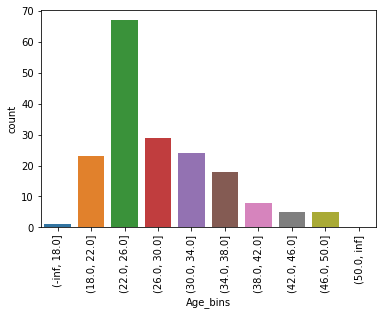

In [213]:
sns.countplot(data=aerofit_bins,x="Age_bins")
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

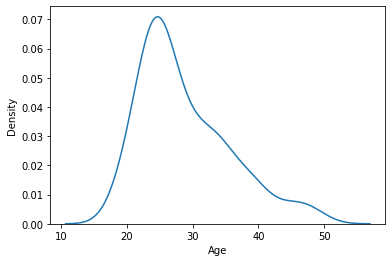

In [214]:
sns.kdeplot(data = aerofit, x="Age",)

<AxesSubplot:xlabel='Income', ylabel='Density'>

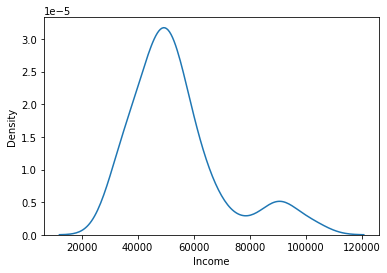

In [215]:
sns.kdeplot(data = aerofit, x="Income",)

##Box plots with respect to products

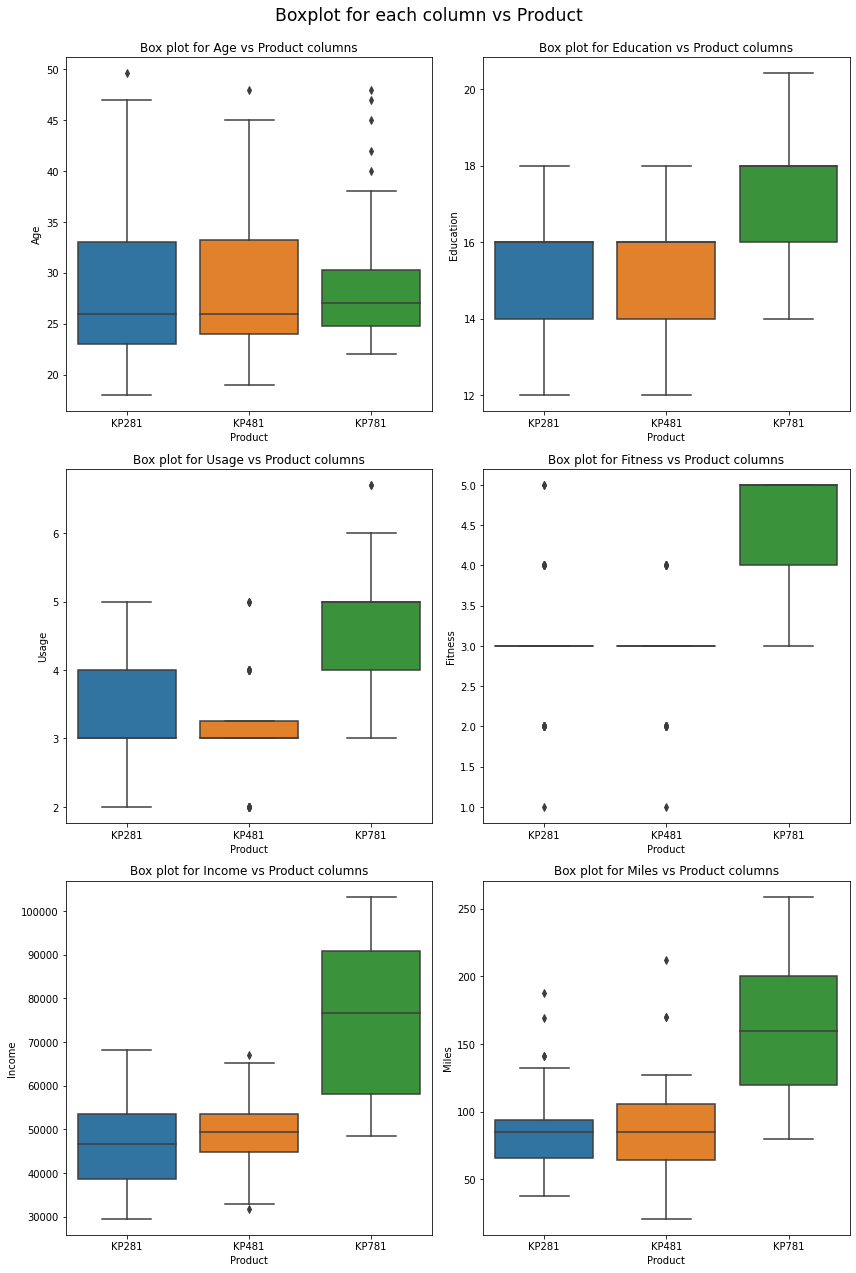

In [216]:
#create a Boxplots
fig = plt.figure(figsize = (12,18))
fig.suptitle("Boxplot for each column vs Product\n",fontsize = "xx-large" )
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
k = 1
for i in iloc_positions_of_numerical_columns:
    plt.subplot(3,2,k)
    plt.title("Box plot for {} vs Product columns".format(aerofit.columns[i]))
    plt.xlabel(aerofit.columns[i])
    sns.boxplot(data=aerofit, x="Product",y = aerofit.iloc[:,i])
    k = k+1
plt.tight_layout()
plt.show()

Multivariate Box plots with Product as legend

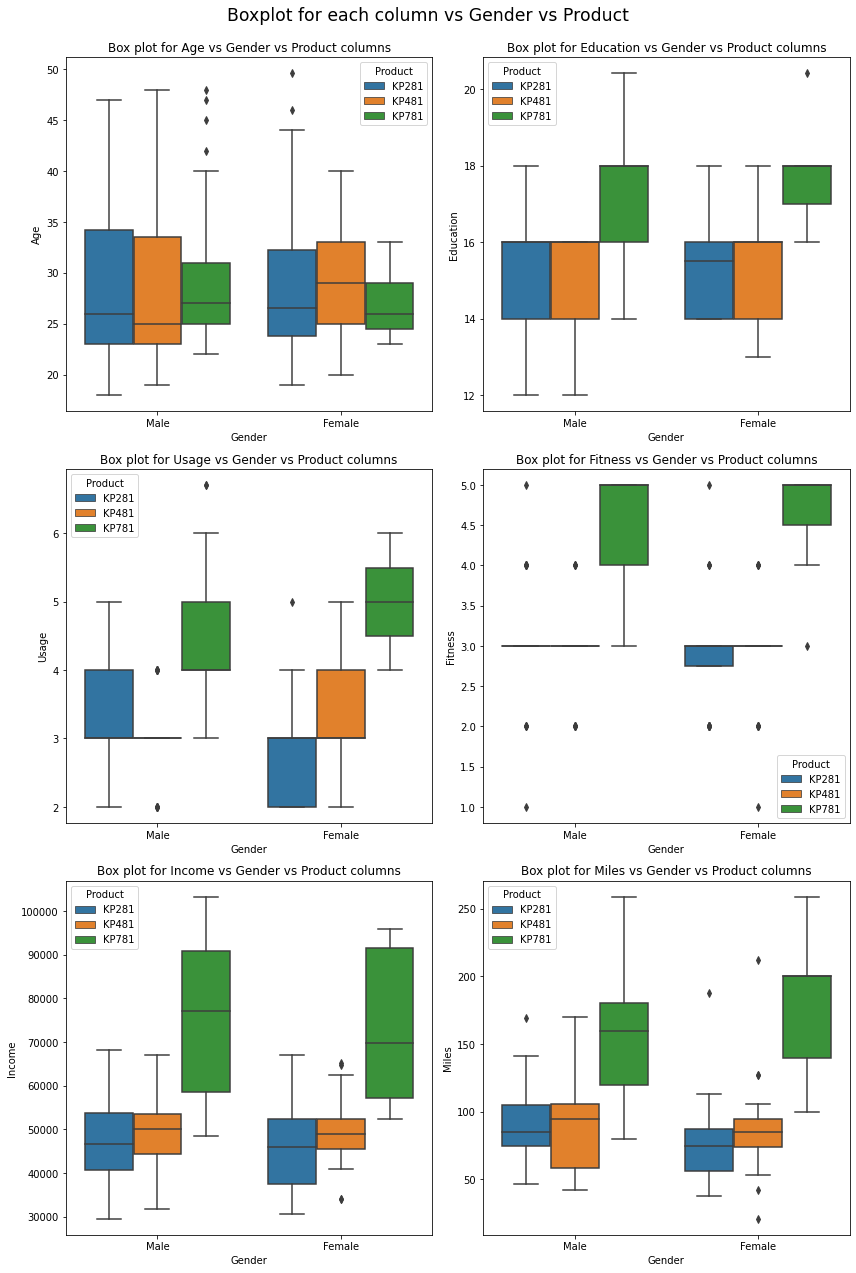

In [217]:
#create a Boxplots
fig = plt.figure(figsize = (12,18))
fig.suptitle("Boxplot for each column vs Gender vs Product\n",fontsize = "xx-large" )
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
k = 1
for i in iloc_positions_of_numerical_columns:
    plt.subplot(3,2,k)
    plt.title("Box plot for {} vs Gender vs Product columns".format(aerofit.columns[i]))
    plt.xlabel(aerofit.columns[i])
    sns.boxplot(data=aerofit, x="Gender",y = aerofit.iloc[:,i],hue = "Product")
    k = k+1
plt.tight_layout()
plt.show()

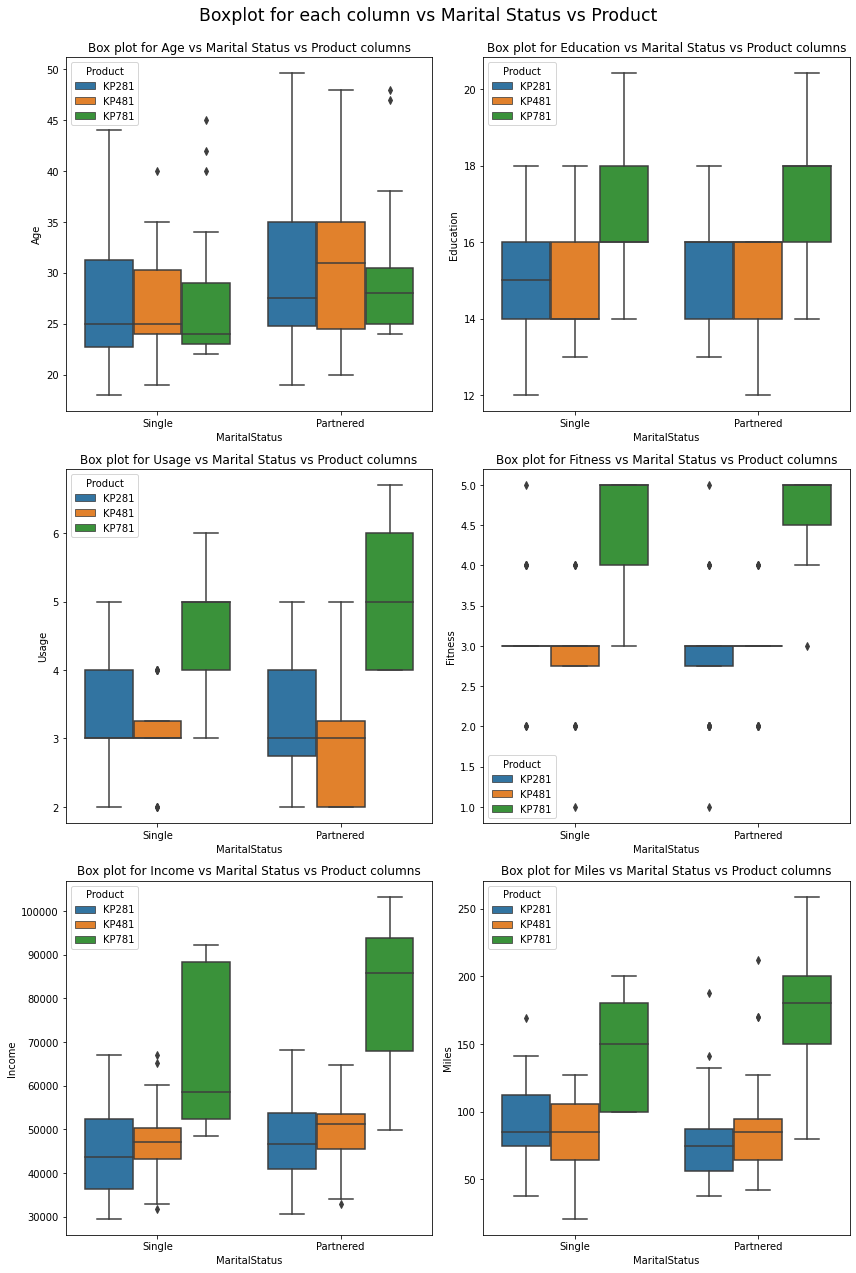

In [218]:
#create a Boxplots
fig = plt.figure(figsize = (12,18))
fig.suptitle("Boxplot for each column vs Marital Status vs Product\n",fontsize = "xx-large" )
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
k = 1
for i in iloc_positions_of_numerical_columns:
    plt.subplot(3,2,k)
    plt.title("Box plot for {} vs Marital Status vs Product columns".format(aerofit.columns[i]))
    plt.xlabel(aerofit.columns[i])
    sns.boxplot(data=aerofit, x="MaritalStatus",y = aerofit.iloc[:,i],hue = "Product")
    k = k+1
plt.tight_layout()
plt.show()

## Heatmaps

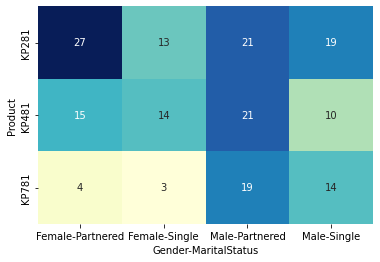

In [219]:
sns.heatmap(pd.crosstab([aerofit["Product"]],[aerofit["Gender"],aerofit["MaritalStatus"]]),cmap="YlGnBu",annot =True,cbar = False)
plt.show()

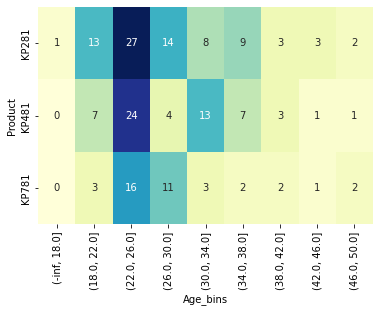

In [220]:
sns.heatmap(pd.crosstab([aerofit_bins["Product"]],aerofit_bins["Age_bins"]),cmap="YlGnBu",annot =True,cbar = False)
plt.show()

Binning of Income

[-inf, 29562.0, 37748.40338405485, 45934.8067681097, 54121.210152164545, 62307.613536219396, 70494.01692027424, 78680.42030432909, 86866.82368838394, 95053.22707243879, 103239.63045649364, inf]


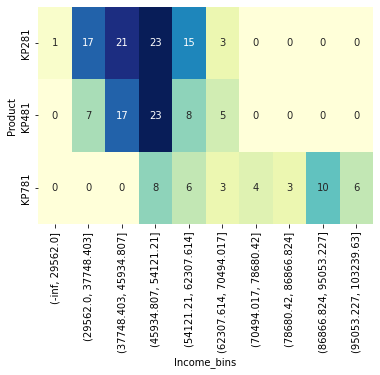

In [221]:
bins = list(np.linspace(aerofit["Income"].min(),aerofit["Income"].max(),10))
bins.insert(0,-np.inf)
bins.append(np.inf)
print(bins)
aerofit_bins["Income_bins"] = pd.cut(aerofit["Income"],bins)
sns.heatmap(pd.crosstab([aerofit_bins["Product"]],aerofit_bins["Income_bins"]),cmap="YlGnBu",annot =True,cbar = False)
plt.show()

[-inf, 1.0, 2.0, 3.0, 4.0, inf]


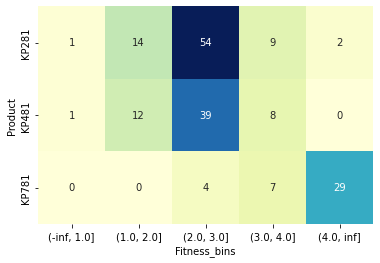

In [222]:
bins = list(np.arange(aerofit["Fitness"].min(),aerofit["Fitness"].max(),1))
bins.insert(0,-np.inf)
bins.append(np.inf)
print(bins)
aerofit_bins["Fitness_bins"] = pd.cut(aerofit["Fitness"],bins)
sns.heatmap(pd.crosstab([aerofit_bins["Product"]],aerofit_bins["Fitness_bins"]),cmap="YlGnBu",annot =True,cbar = False)
plt.show()

[-inf, 2.0, 3.0, 4.0, 5.0, 6.0, inf]


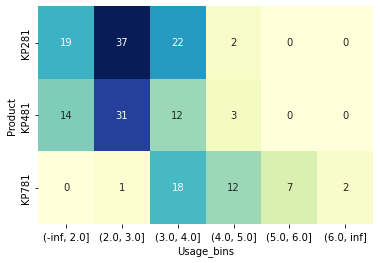

In [223]:
bins = list(np.arange(aerofit["Usage"].min(),aerofit["Usage"].max(),1))
bins.insert(0,-np.inf)
bins.append(np.inf)
print(bins)
aerofit_bins["Usage_bins"] = pd.cut(aerofit["Usage"],bins)
sns.heatmap(pd.crosstab([aerofit_bins["Product"]],aerofit_bins["Usage_bins"]),cmap="YlGnBu",annot =True,cbar = False)
plt.show()

[-inf, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, inf]


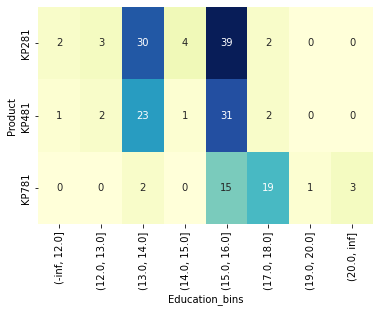

In [224]:
bins = list(np.arange(aerofit["Education"].min(),aerofit["Education"].max(),1))
bins.insert(0,-np.inf)
bins.append(np.inf)
print(bins)
aerofit_bins["Education_bins"] = pd.cut(aerofit["Education"],bins)
sns.heatmap(pd.crosstab([aerofit_bins["Product"]],aerofit_bins["Education_bins"]),cmap="YlGnBu",annot =True,cbar = False)
plt.show()

[-inf, 21.0, 47.420584269985824, 73.84116853997165, 100.26175280995746, 126.68233707994328, 153.1029213499291, 179.5235056199149, 205.94408988990074, 232.36467415988656, 258.7852584298724, inf]


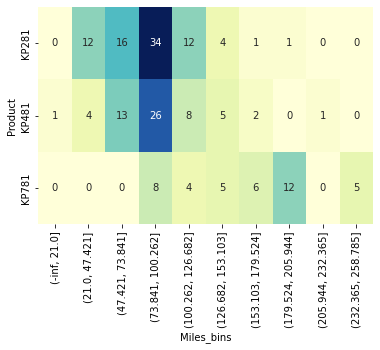

In [225]:
bins = list(np.linspace(aerofit["Miles"].min(),aerofit["Miles"].max(),10))
bins.insert(0,-np.inf)
bins.append(np.inf)
print(bins)
aerofit_bins["Miles_bins"] = pd.cut(aerofit["Miles"],bins)
sns.heatmap(pd.crosstab([aerofit_bins["Product"]],aerofit_bins["Miles_bins"]),cmap="YlGnBu",annot =True,cbar = False)
plt.show()

##KDE plots

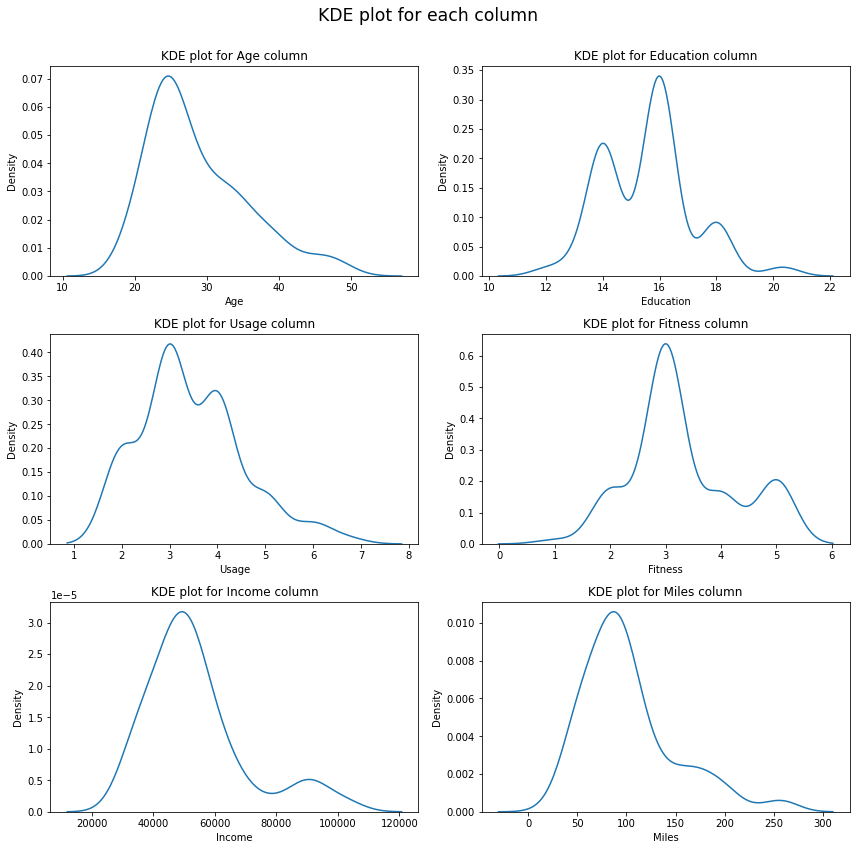

In [226]:
#create a kde plot
fig = plt.figure(figsize = (12,12))
fig.suptitle("KDE plot for each column\n",fontsize = "xx-large" )
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
k = 1
for i in iloc_positions_of_numerical_columns:
    plt.subplot(3,2,k)
    plt.title("KDE plot for {} column".format(aerofit.columns[i]))
    plt.xlabel(aerofit.columns[i])
    sns.kdeplot(data=aerofit, x = aerofit.iloc[:,i])
    k = k+1
plt.tight_layout()
plt.show()

##Hist plots on all columns

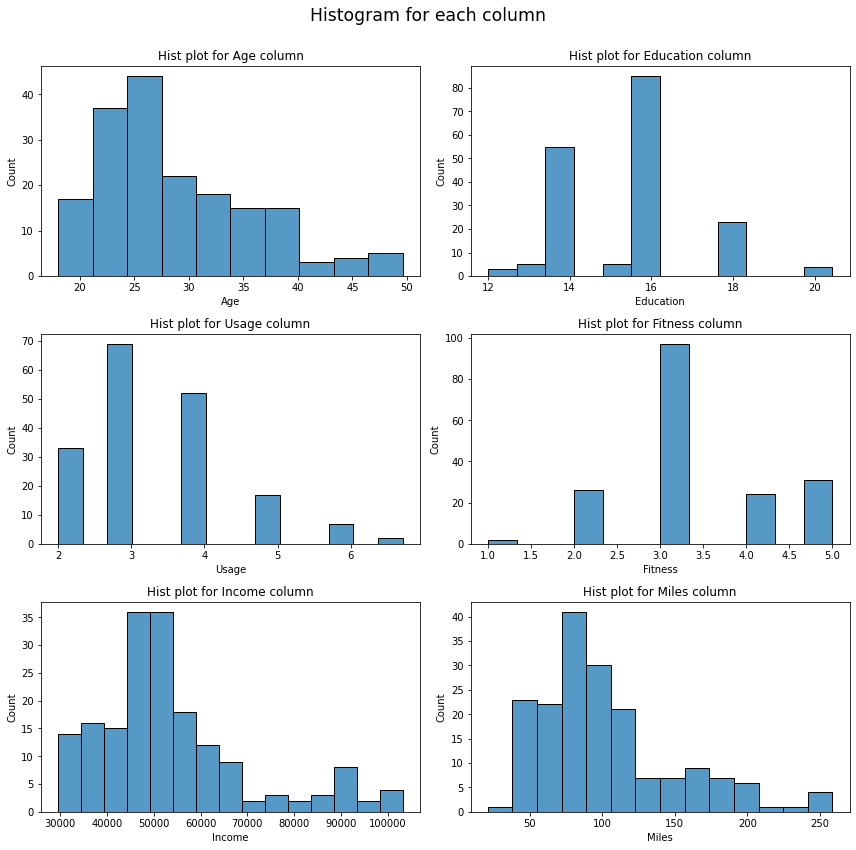

In [227]:
#create a histogram
fig = plt.figure(figsize = (12,12))
fig.suptitle("Histogram for each column\n",fontsize = "xx-large" )
iloc_positions_of_numerical_columns = [1,3,5,6,7,8]
k = 1
for i in iloc_positions_of_numerical_columns:
    plt.subplot(3,2,k)
    plt.title("Hist plot for {} column".format(aerofit.columns[i]))
    plt.xlabel(aerofit.columns[i])
    sns.histplot(data=aerofit, x = aerofit.iloc[:,i])
    k = k+1
plt.tight_layout()
plt.show()

> No Numerical column has perfect normal distribution.

> Fitness column has rating = 3 predominantly.

> Histogram are indicating the MODE values of each column perfectly.

## Pair plot

<Figure size 1440x1440 with 0 Axes>

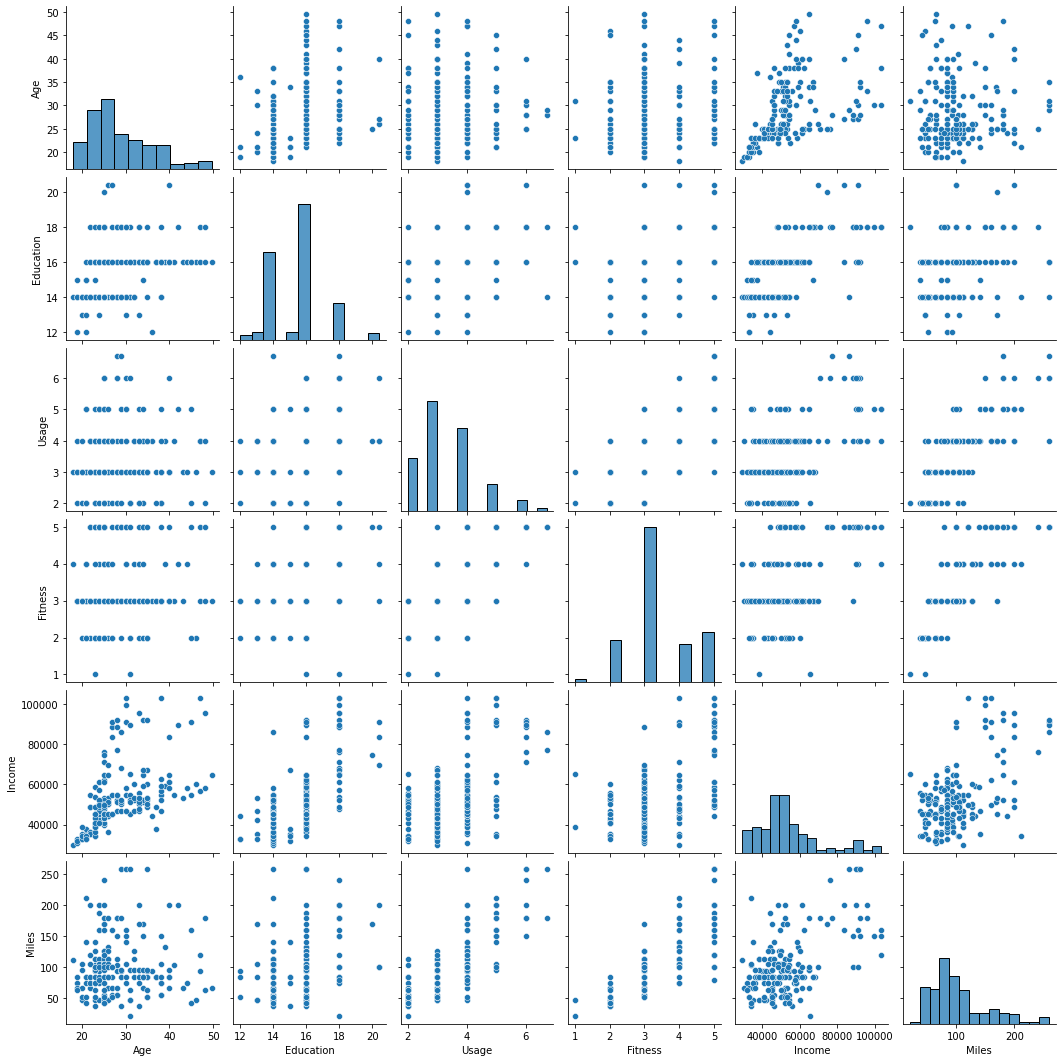

In [228]:
plt.figure(figsize = (20,20))
sns.pairplot(data = aerofit)
plt.show()

#CHAPTER 5: BUSINESS INSIGHTS BASED ON NON-GRAPHICAL AND VISUAL ANALYSIS

## Product Profiling

Important Observations made on KP281 Product:
1. Unit cost = \$1500
2. 44.44% chances that a customer buys this product
3. If customer is female, 52.63% of chances to buy this product.
4. Average age of KP281 Single customers is 26.875 years
5. Average Education life of KP281 Single customers is 14.9 years
6. Average Education life of KP281 Male customer = 14.97 years
7. Average usage of KP281 is aroung 2.8 to 3 per week. Particularly Female Partnered customers using in this range. (lesser compared to KP781)
8. Average income of KP281 is in the range of \$43000 to \$46000
9. Average Miles runned by customer of KP281 is in range of 74 to 78

Important Observations made on KP781 Product:
1. Unit cost = \$2500
2. 22.22% chances that a customer buys this product
3. If customer is female, 9% of chances to buy this product.
4. Average age of KP781 customer in range of 27 to 30 years
5. Average Education life of KP781 Customers is around 17 to 18 years.
7. Average usage of KP781 is around 4 to 5.25 per week.
8. Average income of KP781 is in the range of \$73000 to \$85000
9. Average fitness of KP781 customers in range of 4 to 5
9. Average Miles runned by customer of KP781 is in range of 175 to 210 miles

## Customer Profiling

Observations on Male customers:
1. 57% customers are male
2. 82.5% of KP781 customers are male

Observations on Female customers:
1. 42.2% customers are Female
2. Only 9% female buys KP781.

Observations on Single customers:
1. 40.5% customers are single
2. Average age of KP281 single customers is 26.875
3. Average Education of KP281 single customers is 14.9 years
4. Average income of KP281 single customer is \$44271.937 

Observations of Partnered Customers:
1. 59.44% customers are partnered
2. Average age of KP481 partnered customers is 30.22
3. Average education of KP781 Partnered is 17.40 years

##BUSINESS INSIGHTS

*    Lesser income customers prefers KP281 and Higher income customers prefers KP781
*    Higher Education customers prefers KP781
*    KP781 customers are using more number of years
*    KP781 customers fitness levels are more.
*    Female customers are not prefering KP781
*    Miles runned on KP781 higher than others
*    KP781 customers uses more frequently
*    Female who uses 3 to 4 times per week may buy KP481

#CHAPTER 6: RECOMMENDATIONS

*   KP281 should be prefered to Less income, Low education, who uses less number of times per week, Less fitness customers
*   KP781 should be prefered to higher income, high education, who uses more frequently, higher fitness customers
*    Marketing on attracting Female customers onto KP781 is required
*    Marketing on Higher Age person fitness is also required.
*    KP281 is `USERS CHOICE`
*    KP781 is `FITNESS FREAK CHOICE`